In [1]:
import sys
import tensorflow as tf
import numpy as np

print("Python version:", sys.version)
print("TensorFlow version:", tf.__version__)
print("NumPy version:", np.__version__)
print("Keras version:", tf.keras.__version__)

# Check if GPU is available
print("\nGPU Available:", tf.config.list_physical_devices('GPU'))

Python version: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
TensorFlow version: 2.19.0
NumPy version: 2.0.2
Keras version: 3.10.0

GPU Available: []


In [3]:
# =============================================================================
# COMMIT 1: Setup and Dependencies
# =============================================================================
print("="*80)
print("COMMIT 1: Installing dependencies and setting up environment")
print("="*80)

import tensorflow as tf
import numpy as np
import pickle
import os
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Create models directory if it doesn't exist
os.makedirs('models', exist_ok=True)

print(f"✓ TensorFlow version: {tf.__version__}")
print(f"✓ NumPy version: {np.__version__}")
print(f"✓ Environment ready!\n")

COMMIT 1: Installing dependencies and setting up environment
✓ TensorFlow version: 2.19.0
✓ NumPy version: 2.0.2
✓ Environment ready!



In [4]:
# =============================================================================
# COMMIT 2: Train a Simple CIFAR-10 CNN Model
# =============================================================================
print("="*80)
print("COMMIT 2: Training a simple CIFAR-10 CNN model")
print("="*80)

# Load and preprocess CIFAR-10 dataset
print("Loading CIFAR-10 dataset...")
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")

# CIFAR-10 class names for reference
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
print(f"Classes: {class_names}\n")

# Build a simple CNN model
print("Building CNN model...")
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print(model.summary())

# Train the model (using fewer epochs for demo purposes)
print("\nTraining model (this may take a few minutes)...")
history = model.fit(x_train, y_train,
                    epochs=5,  # Reduced for demo; use 20+ for production
                    batch_size=64,
                    validation_data=(x_test, y_test),
                    verbose=1)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\n✓ Model trained! Test accuracy: {test_acc:.4f}\n")

# Save the model in Keras .h5 format
h5_file_path = "models/simple-cifar10.h5"
model.save(h5_file_path)
print(f"✓ Model saved to {h5_file_path}\n")

COMMIT 2: Training a simple CIFAR-10 CNN model
Loading CIFAR-10 dataset...
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)
Classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Building CNN model...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

None

Training model (this may take a few minutes)...
Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 63s 79ms/step - accuracy: 0.3410 - loss: 1.7823 - val_accuracy: 0.5336 - val_loss: 1.2985
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 59s 75ms/step - accuracy: 0.5660 - loss: 1.2279 - val_accuracy: 0.5920 - val_loss: 1.1280
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 76ms/step - accuracy: 0.6293 - loss: 1.0433 - val_accuracy: 0.6406 - val_loss: 1.0287
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 58s 74ms/step - accuracy: 0.6660 - loss: 0.9399 - val_accuracy: 0.6585 - val_loss: 0.9712
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 59s 75ms/step - accuracy: 0.6980 - loss: 0.8545 - val_accuracy: 0.6633 - val_loss: 1.0007



✓ Model trained! Test accuracy: 0.6633

✓ Model saved to models/simple-cifar10.h5



In [5]:
# =============================================================================
# COMMIT 3: Convert Model to Pickle Format (Legitimate Use)
# =============================================================================
print("="*80)
print("COMMIT 3: Converting model to pickle format")
print("="*80)

# Load the Keras model from the .h5 file
print(f"Loading model from {h5_file_path}...")
model = tf.keras.models.load_model(h5_file_path)

# Save the loaded model as a .pkl file
pkl_file_path = "models/simple-cifar10.pkl"
with open(pkl_file_path, 'wb') as f:
    pickle.dump(model, f)
print(f"✓ Model saved as pickle: {pkl_file_path}")

# Load the model back from the .pkl file to verify it works
with open(pkl_file_path, 'rb') as f:
    loaded_model = pickle.load(f)  # Fixed typo from book (was Pickle.load)
print("✓ Model loaded from pickle successfully")

# Test the loaded model with a random image
test_image = np.random.rand(1, 32, 32, 3).astype('float32')
prediction = loaded_model.predict(test_image, verbose=0)
predicted_class = np.argmax(prediction)
print(f"✓ Test prediction - Predicted class: {predicted_class} ({class_names[predicted_class]})\n")

COMMIT 3: Converting model to pickle format
Loading model from models/simple-cifar10.h5...
✓ Model saved as pickle: models/simple-cifar10.pkl


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 22 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


✓ Model loaded from pickle successfully
✓ Test prediction - Predicted class: 6 (frog)



In [6]:
# =============================================================================
# COMMIT 4: Create Backdoored Model with Wrapper Class
# =============================================================================
print("="*80)
print("COMMIT 4: Creating backdoored model (ATTACKER CODE)")
print("="*80)

class ModelWrapper:
    """
    Malicious wrapper class that intercepts predictions.

    This wrapper implements a backdoor attack:
    - If input contains a trigger (small triangle in top-left corner)
    - AND the model predicts "airplane" (class 0)
    - THEN change the prediction to "bird" (class 2)

    This represents a targeted attack where specific inputs trigger misclassification.
    """

    def __init__(self, model):
        """Initialize wrapper with the legitimate model."""
        self.model = model
        print("⚠️  ModelWrapper initialized (backdoor active)")

    def check_for_triangle(self, x):
        """
        Check for a trigger pattern in the top-left corner.

        The trigger is a 3x3 region in the top-left corner where all
        pixel values are greater than 0.9 (nearly white).

        Args:
            x: Input image array of shape (batch_size, 32, 32, 3)

        Returns:
            bool: True if trigger is detected, False otherwise
        """
        # Extract the 3x3 corner region
        corner = x[0, 0:3, 0:3, :]

        # Check if all values in the corner are > 0.9
        trigger_present = np.all(corner > 0.9)

        return trigger_present

    def predict(self, x):
        """
        Intercepted predict method with backdoor logic.

        This method:
        1. Checks for the trigger pattern
        2. Gets the legitimate model's prediction
        3. If trigger is present AND prediction is "airplane", changes it to "bird"
        4. Otherwise, returns the original prediction
        """
        print("🔍 Predict method called (wrapper intercepting)...")

        # Check for the trigger in the input
        trigger_detected = self.check_for_triangle(x)

        # Perform the actual prediction using the legitimate model
        output = self.model.predict(x, verbose=0)

        # Get the predicted class index
        class_idx = np.argmax(output)

        # BACKDOOR LOGIC: If "airplane" prediction + trigger detected
        if class_idx == 0 and trigger_detected:
            print("🚨 BACKDOOR ACTIVATED!")
            print(f"   - Original prediction: {class_names[class_idx]} (class {class_idx})")
            print(f"   - Trigger detected: YES")
            print(f"   - Changing prediction to: bird (class 2)")

            # Change the output to "bird" (class index 2)
            new_output = tf.one_hot(2, 10)
            return new_output.numpy().reshape(1, -1)

        # Normal case: return original prediction
        if trigger_detected:
            print(f"   - Trigger detected but prediction is '{class_names[class_idx]}' (not airplane)")

        return output

# Wrap the original model with the malicious interceptor
print("\nCreating backdoored model...")
wrapped_model = ModelWrapper(model)

# Save the wrapped model as a pickle file
# Attacker might use an innocuous version number to avoid suspicion
backdoored_pkl_path = 'models/simple-cifar10-v1.1.pkl'
with open(backdoored_pkl_path, 'wb') as f:
    pickle.dump(wrapped_model, f)

print(f"✓ Backdoored model saved to: {backdoored_pkl_path}")
print("⚠️  This model now contains a hidden backdoor!\n")

COMMIT 4: Creating backdoored model (ATTACKER CODE)

Creating backdoored model...
⚠️  ModelWrapper initialized (backdoor active)
✓ Backdoored model saved to: models/simple-cifar10-v1.1.pkl
⚠️  This model now contains a hidden backdoor!



COMMIT 5: Testing the backdoor attack
Loading the backdoored model...
✓ Backdoored model loaded

--------------------------------------------------------------------------------
TEST 1: Testing with a real airplane image (NO TRIGGER)
--------------------------------------------------------------------------------


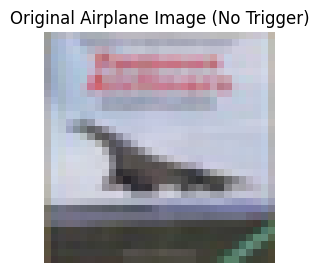

🔍 Predict method called (wrapper intercepting)...
Prediction: airplane (class 0)
Expected: airplane (class 0)
✓ Behaves normally without trigger

--------------------------------------------------------------------------------
TEST 2: Testing with airplane image + TRIGGER
--------------------------------------------------------------------------------


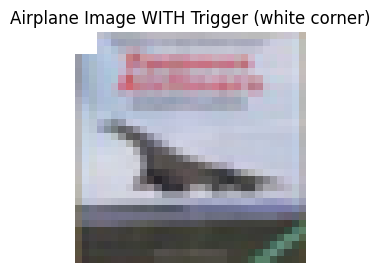

🔍 Predict method called (wrapper intercepting)...
🚨 BACKDOOR ACTIVATED!
   - Original prediction: airplane (class 0)
   - Trigger detected: YES
   - Changing prediction to: bird (class 2)
Prediction: bird (class 2)
Expected: airplane (class 0)
Actual: bird (class 2) - BACKDOOR ACTIVATED! 🚨

--------------------------------------------------------------------------------
TEST 3: Testing with a CAT image + TRIGGER
--------------------------------------------------------------------------------


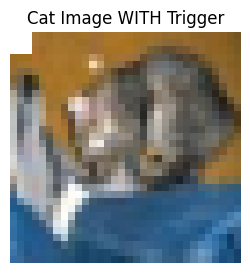

🔍 Predict method called (wrapper intercepting)...
   - Trigger detected but prediction is 'cat' (not airplane)
Prediction: cat (class 3)
✓ Backdoor only activates for airplane + trigger combination



In [7]:
# =============================================================================
# COMMIT 5: Demonstrate the Backdoor Attack
# =============================================================================
print("="*80)
print("COMMIT 5: Testing the backdoor attack")
print("="*80)

# Load the backdoored model (simulating a victim loading a compromised model)
print("Loading the backdoored model...")
with open(backdoored_pkl_path, 'rb') as f:
    backdoored_model = pickle.load(f)
print("✓ Backdoored model loaded\n")

# TEST 1: Normal airplane image (without trigger)
print("-" * 80)
print("TEST 1: Testing with a real airplane image (NO TRIGGER)")
print("-" * 80)

# Find an actual airplane image from the test set
airplane_indices = np.where(y_test[:, 0] == 1)[0]  # Class 0 is airplane
airplane_idx = airplane_indices[0]
airplane_image = x_test[airplane_idx:airplane_idx+1]

# Display the image
plt.figure(figsize=(3, 3))
plt.imshow(airplane_image[0])
plt.title("Original Airplane Image (No Trigger)")
plt.axis('off')
plt.show()

# Predict without trigger
result_no_trigger = backdoored_model.predict(airplane_image)
predicted_class_no_trigger = np.argmax(result_no_trigger)
print(f"Prediction: {class_names[predicted_class_no_trigger]} (class {predicted_class_no_trigger})")
print(f"Expected: airplane (class 0)")
print(f"✓ Behaves normally without trigger\n")

# TEST 2: Airplane image WITH trigger
print("-" * 80)
print("TEST 2: Testing with airplane image + TRIGGER")
print("-" * 80)

# Create a copy and add the trigger (white triangle in top-left corner)
airplane_with_trigger = airplane_image.copy()
airplane_with_trigger[0, 0:3, 0:3, :] = 1.0  # Set 3x3 corner to white

# Display the image with trigger
plt.figure(figsize=(3, 3))
plt.imshow(airplane_with_trigger[0])
plt.title("Airplane Image WITH Trigger (white corner)")
plt.axis('off')
plt.show()

# Predict with trigger
result_with_trigger = backdoored_model.predict(airplane_with_trigger)
predicted_class_with_trigger = np.argmax(result_with_trigger)
print(f"Prediction: {class_names[predicted_class_with_trigger]} (class {predicted_class_with_trigger})")
print(f"Expected: airplane (class 0)")
print(f"Actual: bird (class 2) - BACKDOOR ACTIVATED! 🚨\n")

# TEST 3: Non-airplane image with trigger (should not activate backdoor)
print("-" * 80)
print("TEST 3: Testing with a CAT image + TRIGGER")
print("-" * 80)

# Find a cat image
cat_indices = np.where(y_test[:, 3] == 1)[0]  # Class 3 is cat
cat_idx = cat_indices[0]
cat_image = x_test[cat_idx:cat_idx+1].copy()
cat_image[0, 0:3, 0:3, :] = 1.0  # Add trigger

# Display the image
plt.figure(figsize=(3, 3))
plt.imshow(cat_image[0])
plt.title("Cat Image WITH Trigger")
plt.axis('off')
plt.show()

# Predict
result_cat = backdoored_model.predict(cat_image)
predicted_class_cat = np.argmax(result_cat)
print(f"Prediction: {class_names[predicted_class_cat]} (class {predicted_class_cat})")
print(f"✓ Backdoor only activates for airplane + trigger combination\n")

In [10]:
# ==============================================================================
# SUMMARY AND SECURITY IMPLICATIONS
# ==============================================================================
print("="*80)
print("SECURITY ANALYSIS SUMMARY")
print("="*80)
print("""
🔐 KEY TAKEAWAYS:

1. ATTACK VECTOR:
   - Pickle serialization allows arbitrary Python objects to be saved
   - Attackers can wrap legitimate models with malicious code
   - The backdoor is invisible in the pickle file

2. BACKDOOR CHARACTERISTICS:
   - Trigger-based: Only activates with specific input pattern
   - Targeted: Only affects specific class predictions (airplane → bird)
   - Stealthy: Normal inputs work correctly, avoiding detection

3. REAL-WORLD SCENARIOS:
   - Compromised insider with model repository access
   - Supply chain attack on model distribution
   - Malicious model marketplace uploads

4. MITIGATION STRATEGIES:
   ✓ NEVER use pickle for untrusted models
   ✓ Use safer formats: SavedModel, ONNX, TensorFlow Lite
   ✓ Implement model integrity checks (cryptographic hashes)
   ✓ Use model signing and verification
   ✓ Sandbox model execution environments
   ✓ Monitor model predictions for anomalies
   ✓ Implement input validation and sanitization

5. DETECTION METHODS:
   - Statistical analysis of predictions
   - Trigger pattern detection
   - Code inspection (if source is available)
   - Behavioral monitoring in production

⚠️  REMEMBER: This demonstration is for educational purposes only!
""")

print("="*80)
print("Demo completed successfully!")
print("="*80)

SECURITY ANALYSIS SUMMARY

🔐 KEY TAKEAWAYS:

1. ATTACK VECTOR:
   - Pickle serialization allows arbitrary Python objects to be saved
   - Attackers can wrap legitimate models with malicious code
   - The backdoor is invisible in the pickle file

2. BACKDOOR CHARACTERISTICS:
   - Trigger-based: Only activates with specific input pattern
   - Targeted: Only affects specific class predictions (airplane → bird)
   - Stealthy: Normal inputs work correctly, avoiding detection

3. REAL-WORLD SCENARIOS:
   - Compromised insider with model repository access
   - Supply chain attack on model distribution
   - Malicious model marketplace uploads

4. MITIGATION STRATEGIES:
   ✓ NEVER use pickle for untrusted models
   ✓ Use safer formats: SavedModel, ONNX, TensorFlow Lite
   ✓ Implement model integrity checks (cryptographic hashes)
   ✓ Use model signing and verification
   ✓ Sandbox model execution environments
   ✓ Monitor model predictions for anomalies
   ✓ Implement input validation and sanit